In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
warnings.filterwarnings("ignore")

C:\Users\Chesta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# reading the data we have
train_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/train.csv/train.csv")
features_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/features.csv/features.csv")
store_data = pd.read_csv("C:/Users/Chesta/Downloads/walmart-recruiting-store-sales-forecasting/stores.csv")

In [3]:
features_train_data = train_data.merge(features_data,left_on=['Store','Date'],right_on=['Store','Date'])

In [4]:
combine_data = features_train_data.merge(store_data,left_on=['Store'],right_on=['Store'])
combine_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [5]:
combine_data.reset_index(drop=True,inplace=True)
combine_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [6]:
combine_data['Date']= pd.to_datetime(combine_data['Date'],errors='coerce')

In [7]:
combine_data.sort_values(by=['Store','Dept'],inplace=True)

In [8]:
import seaborn as sns

In [10]:
combine_data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [11]:
def null_values(x):
    column_with_null_values = {}
    for i in x:
        # print(i)
        if (combine_data[i].isna().sum()!=0):
            # print(i)
            column_with_null_values[i] = round((combine_data[i].isna().sum()/len(combine_data))*100,2)
            # return(f'{i} {round((application_data[i].isna().sum()/len(application_data))*100,2)}')
            
    return column_with_null_values

In [12]:
numerical_columns = [combine_data[i].name  for i in combine_data.columns if combine_data[i].dtype!='object']

In [13]:
numerical_null_values= null_values(numerical_columns)

In [14]:
for i,j in numerical_null_values.items():
    if j >50:
        combine_data.drop(columns = i,inplace=True)

In [15]:
combine_data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [16]:
combine_data['Date']= pd.to_datetime(combine_data['Date'],errors='coerce')

In [17]:
combine_data['year']=combine_data.Date.dt.year
combine_data['month']=combine_data.Date.dt.month
combine_data['weekday']=combine_data.Date.dt.day_of_week
combine_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,4
73,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,4
145,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315,2010,2,4
218,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315,2010,2,4
290,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315,2010,3,4


<AxesSubplot: >

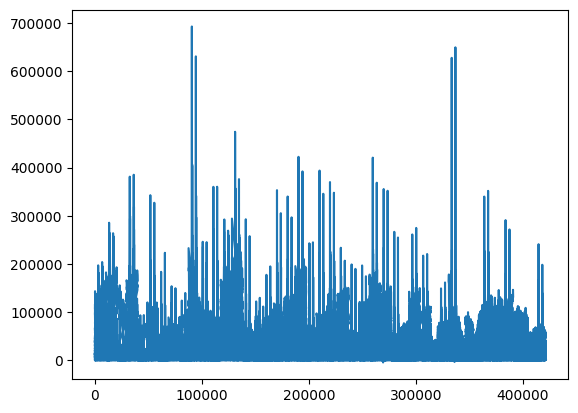

In [18]:
combine_data['Weekly_Sales'].plot()

In [19]:
store1_dept1=  combine_data[(combine_data['Store']==1) & (combine_data['Dept']==1)]

<AxesSubplot: >

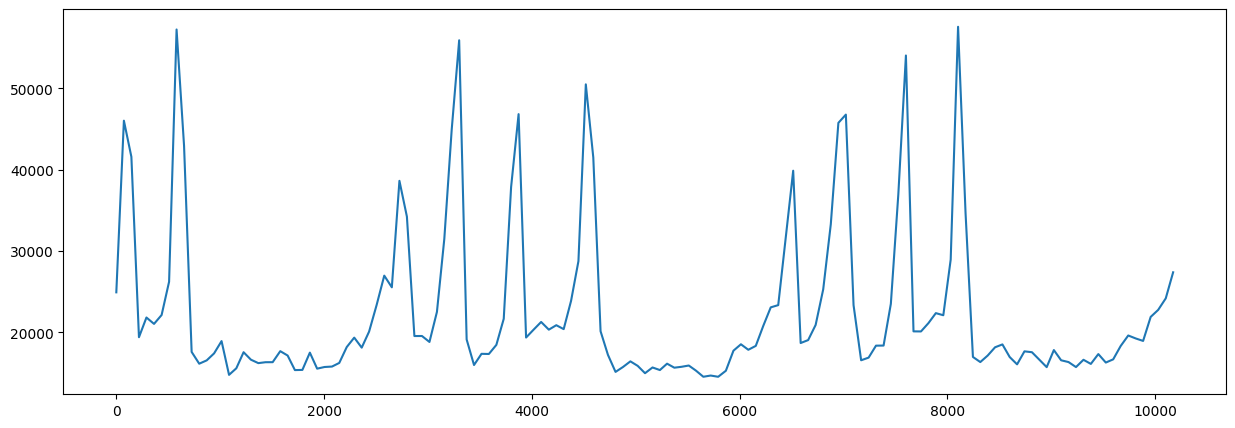

In [20]:
store1_dept1['Weekly_Sales'].plot(figsize=(15,5))

In [21]:
store1_dept1.set_index('Date',inplace=True)

<AxesSubplot: xlabel='Date'>

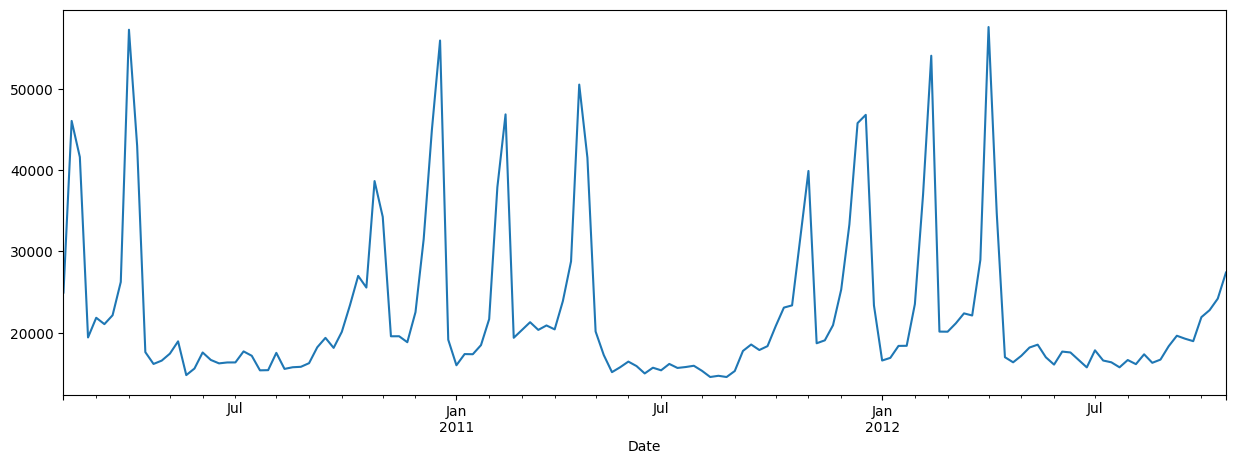

In [22]:
store1_dept1['Weekly_Sales'].plot(figsize=(15,5))

In [23]:
store1_dept1.Temperature.describe()

count    143.000000
mean      68.306783
std       14.250486
min       35.400000
25%       58.265000
50%       69.640000
75%       80.485000
max       91.650000
Name: Temperature, dtype: float64

In [24]:
store1_dept1['Weekly_Sales'].describe()

count      143.000000
mean     22513.322937
std       9854.349032
min      14537.370000
25%      16494.630000
50%      18535.480000
75%      23214.215000
max      57592.120000
Name: Weekly_Sales, dtype: float64

In [25]:
store1_dept1.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday
Date,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,4
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,4
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315,2010,2,4
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315,2010,2,4
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315,2010,3,4


In [26]:
## which quarter does have the maximum sales for each year
store1_dept1['Quarters']=store1_dept1.index.quarter

In [27]:
weekly_sales_pie = store1_dept1.groupby(['year','Quarters'])['Weekly_Sales'].aggregate('mean')

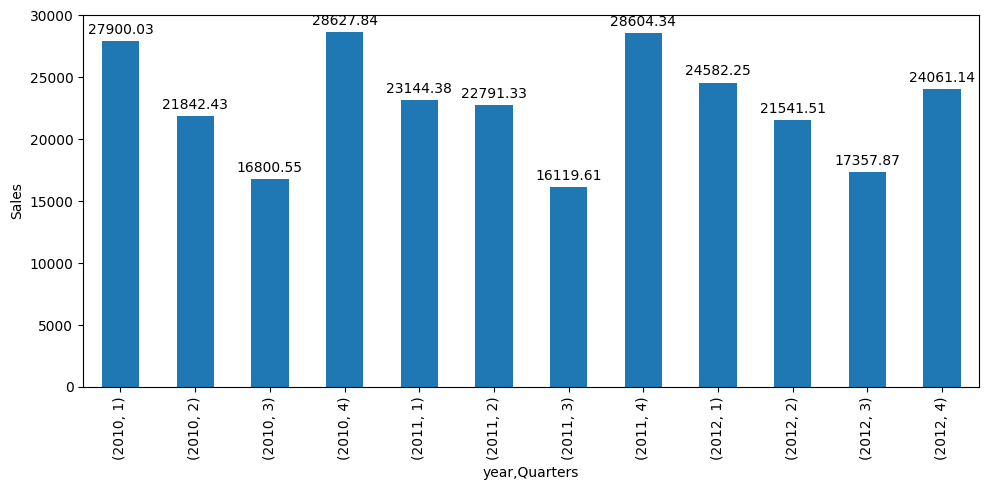

In [28]:
plots = weekly_sales_pie.plot(kind='bar',figsize=(10,5))
plt.ylabel("Sales")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.tight_layout()


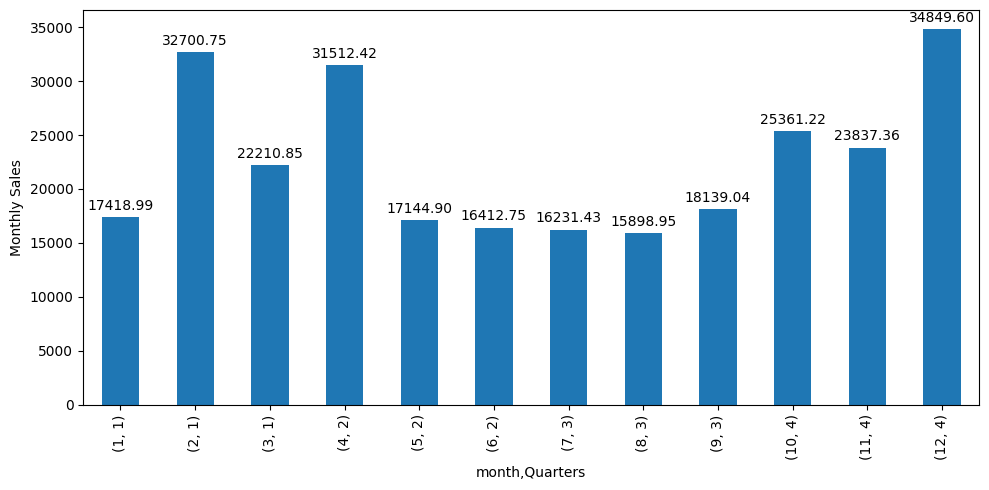

In [29]:
monthly_slaes = store1_dept1.groupby(['month','Quarters'])['Weekly_Sales'].aggregate('mean')
plots = monthly_slaes.plot(kind='bar',figsize=(10,5))
plt.ylabel("Monthly Sales")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.tight_layout()

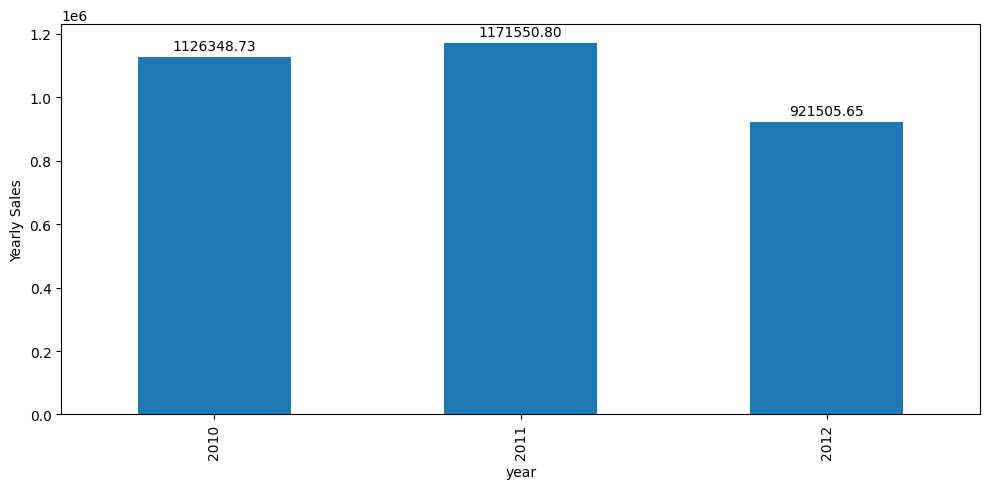

In [30]:
yearly_slaes = store1_dept1.groupby(['year'])['Weekly_Sales'].aggregate('sum')
plots = yearly_slaes.plot(kind='bar',figsize=(10,5))
plt.ylabel("Yearly Sales")
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.tight_layout()

In [31]:
store1_dept1.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday,Quarters
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,4,1
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,4,1
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315,2010,2,4,1
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315,2010,2,4,1
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315,2010,3,4,1


In [32]:
data_predictions = store1_dept1.copy()

In [33]:
data_predictions['log_sales'] = np.log(data_predictions.Weekly_Sales)
data_predictions.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday,Quarters,log_sales
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,4,1,10.123607
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,4,1,10.737255
2010-02-19,1,1,41595.55,False,39.93,2.514,211.289143,8.106,False,A,151315,2010,2,4,1,10.635748
2010-02-26,1,1,19403.54,False,46.63,2.561,211.319643,8.106,False,A,151315,2010,2,4,1,9.873211
2010-03-05,1,1,21827.90,False,46.50,2.625,211.350143,8.106,False,A,151315,2010,3,4,1,9.990944


In [34]:
corr_data = data_predictions.corr()

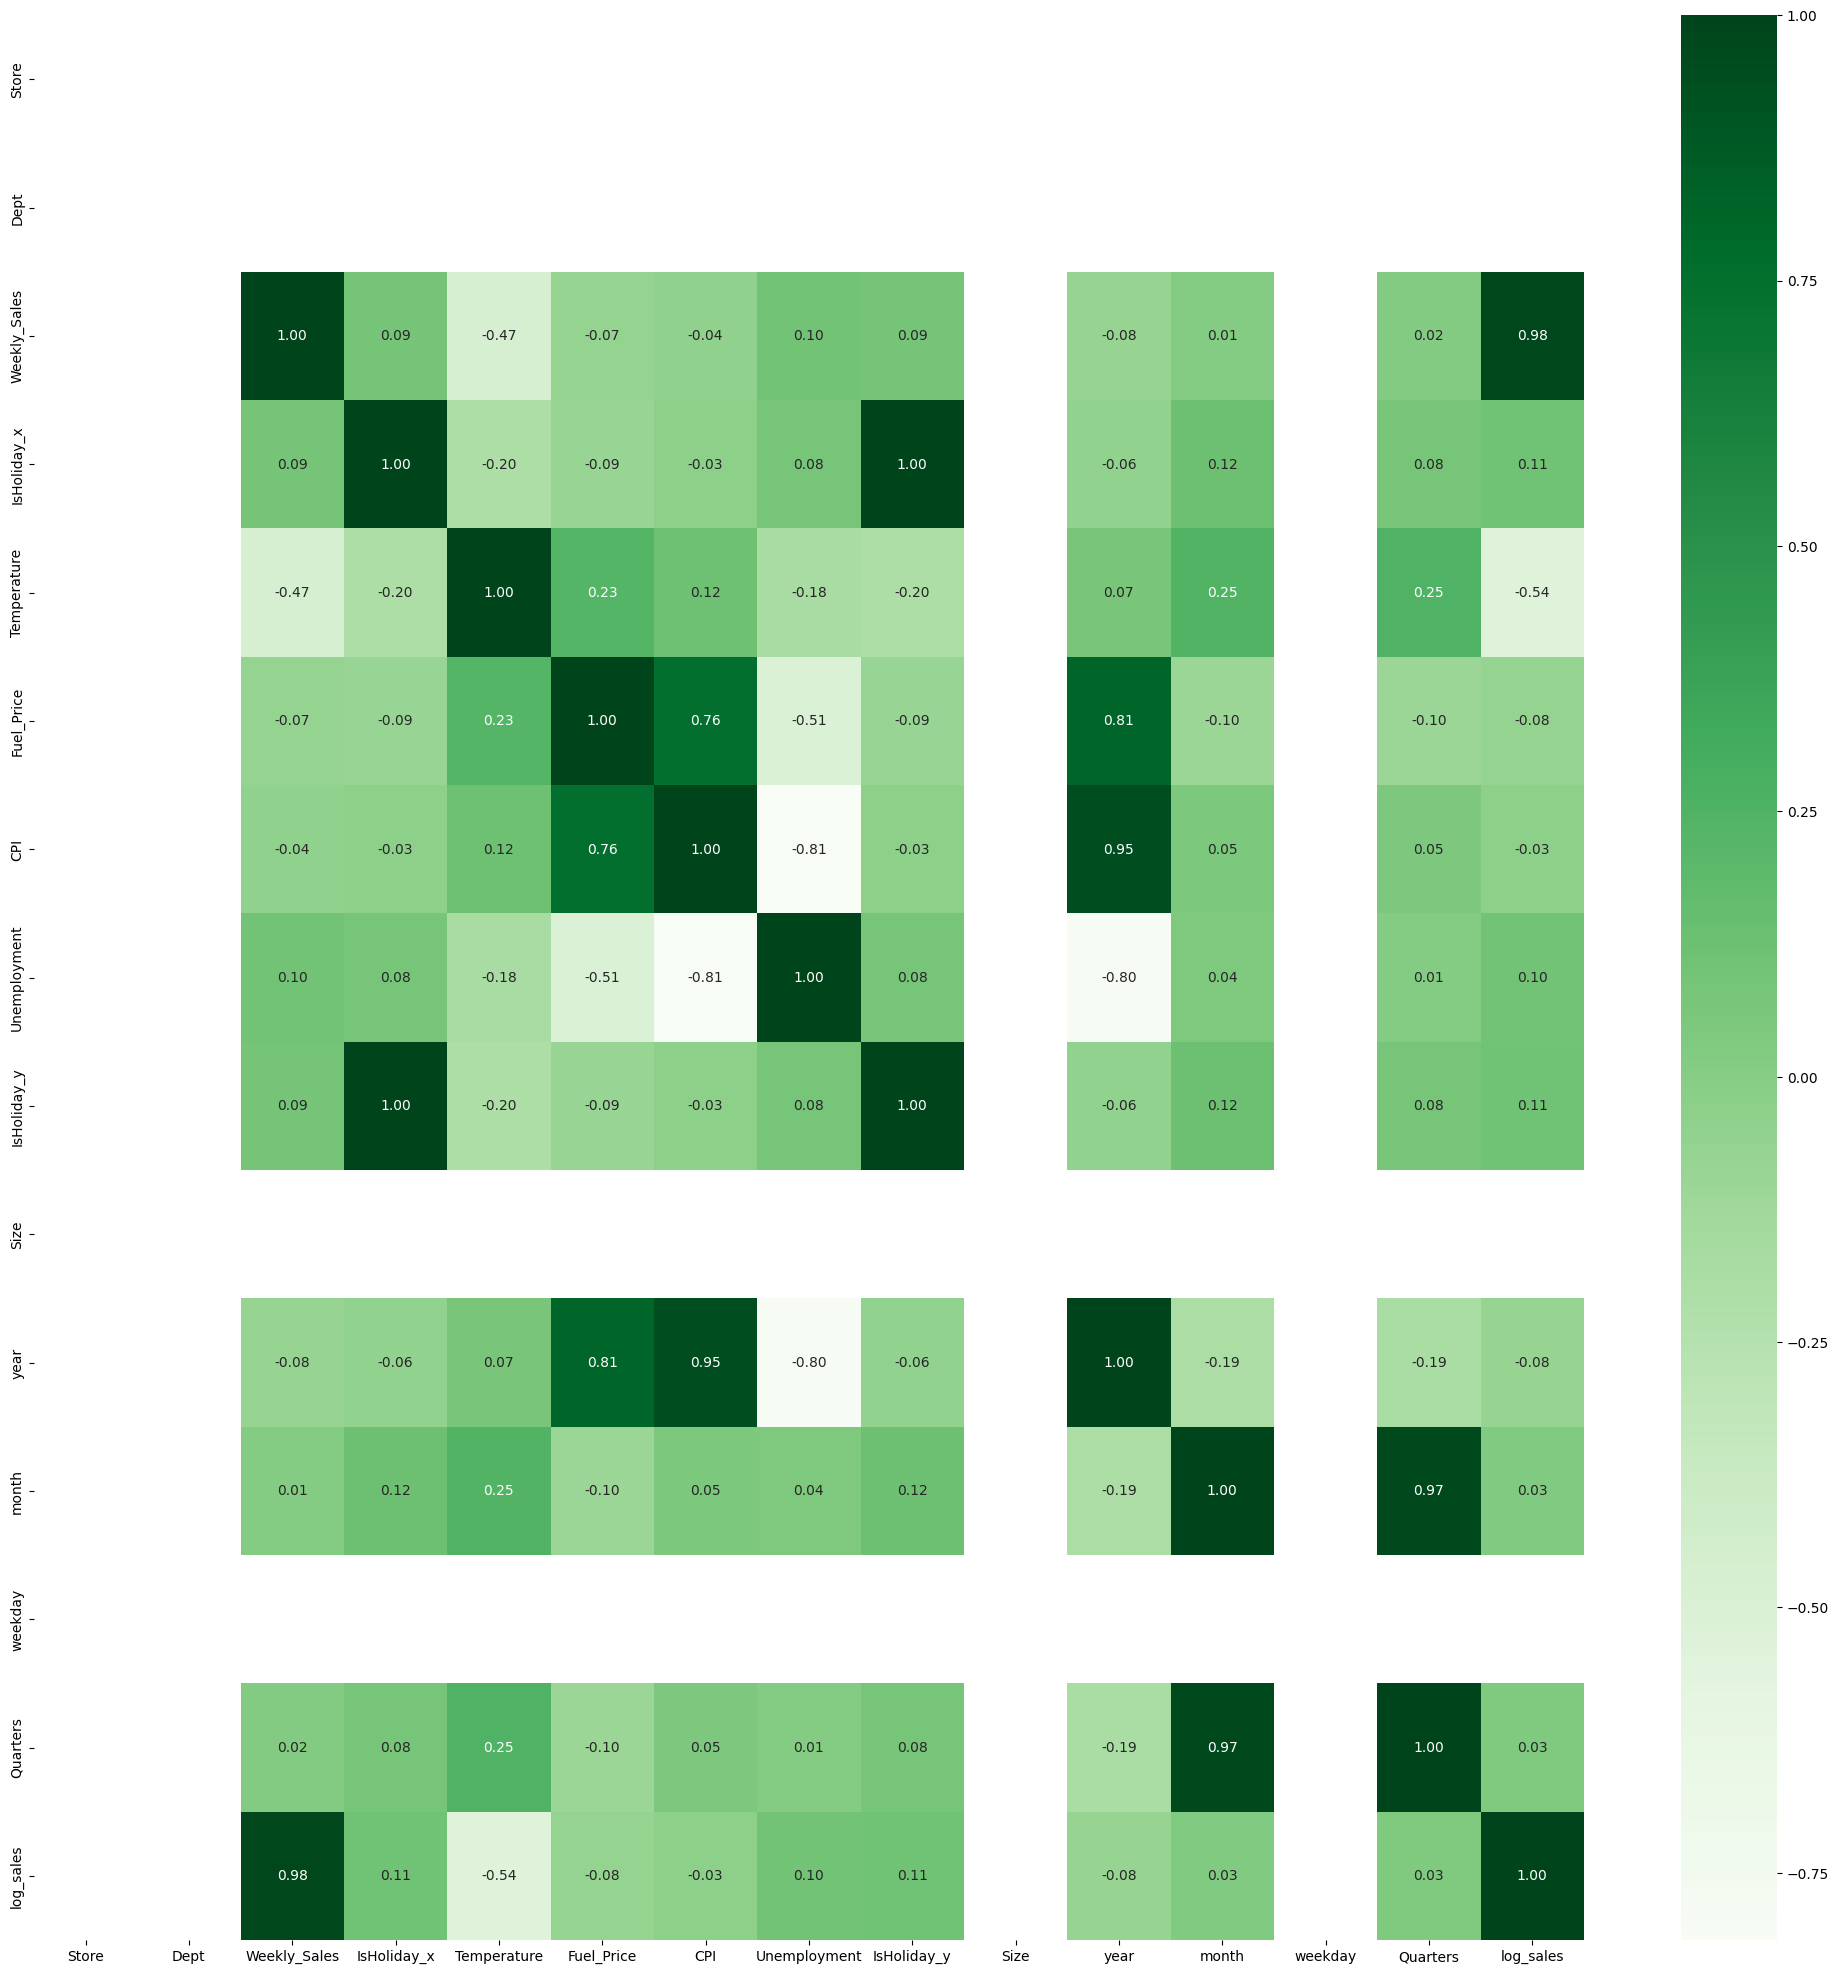

In [35]:
plt.figure(figsize=(25,25))
sns.heatmap(data=corr_data,annot=True,cmap="Greens",cbar=True,fmt='.2f')
plt.show()

In [36]:
df_p2 = store1_dept1[['Weekly_Sales']]
df_p2.head()

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [37]:
df_p2['Date']= df_p2.index
# df_p2

In [38]:
df_p2.columns=['y','ds']
# df_p2

In [39]:
m2 = Prophet()

In [40]:
m2.fit(df_p2)

13:28:53 - cmdstanpy - INFO - Chain [1] start processing
13:28:53 - cmdstanpy - INFO - Chain [1] done processing


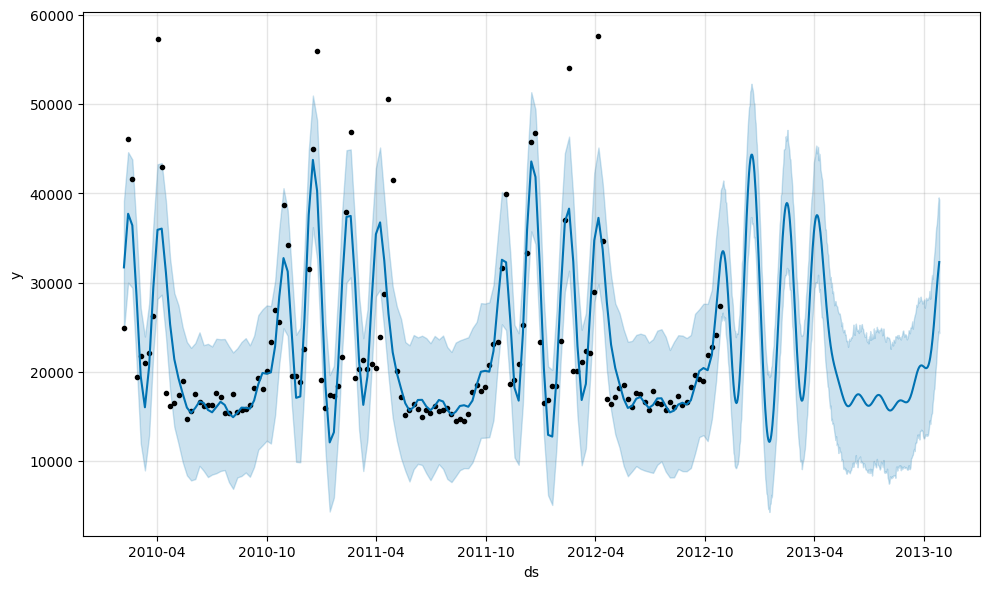

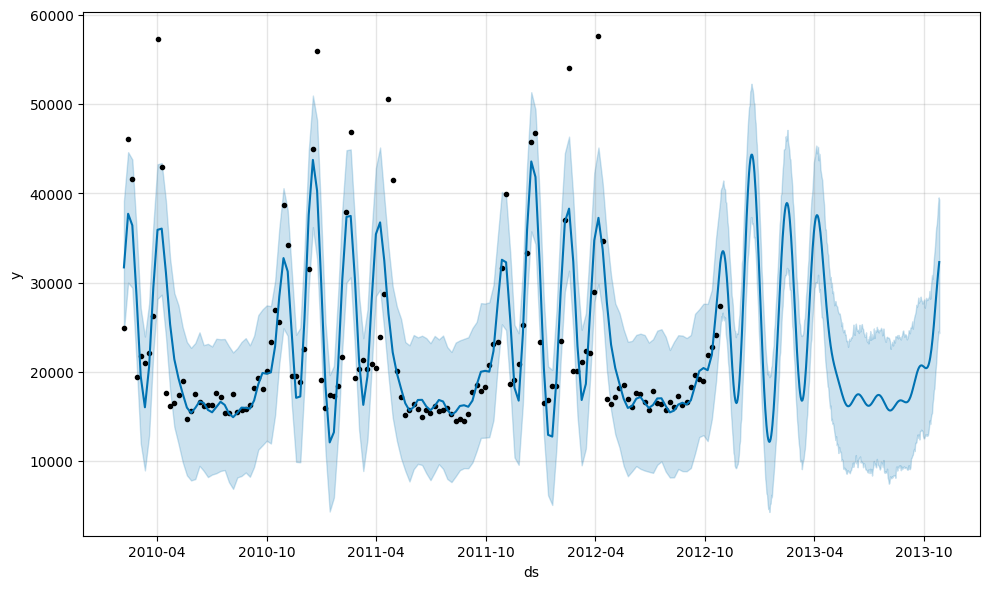

In [41]:
future = m2.make_future_dataframe(periods=365)
forecast = m2.predict(future)
m2.plot(forecast)

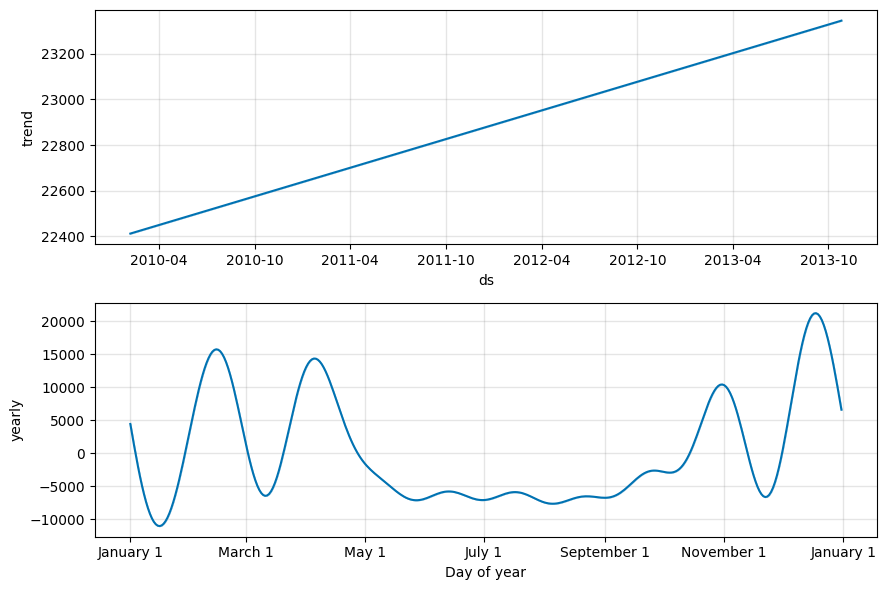

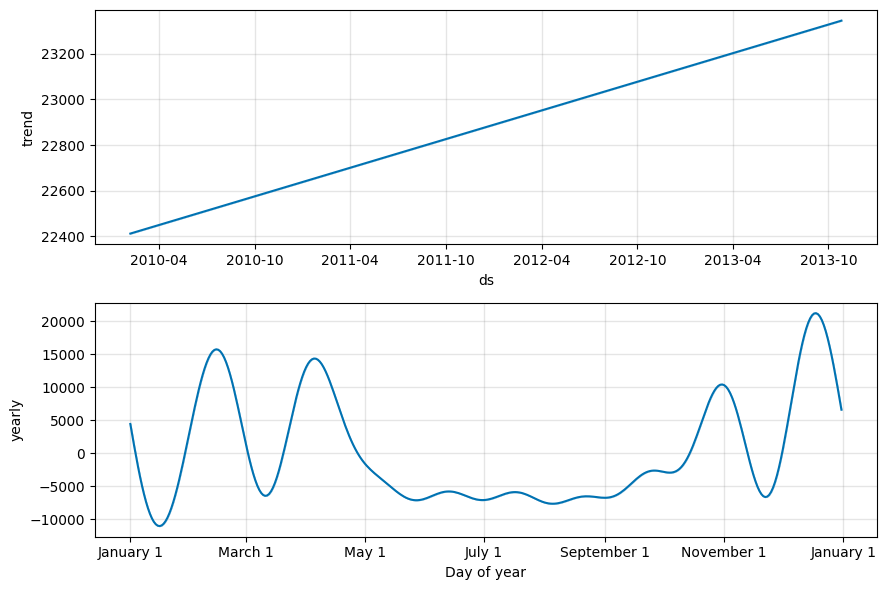

In [42]:
m2.plot_components(forecast)

In [43]:
len(store1_dept1)

143

#### Adding the regressors

In [44]:
store1_dept1.head(2)

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday_y,Type,Size,year,month,weekday,Quarters
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,False,A,151315,2010,2,4,1
2010-02-12,1,1,46039.49,True,38.51,2.548,211.242170,8.106,True,A,151315,2010,2,4,1


In [45]:
df_p2['IsHoliday_x']= store1_dept1['IsHoliday_x']
df_p2['Temperature']= store1_dept1['Temperature']
df_p2['Unemployment']=store1_dept1['Unemployment']
df_p2.head()

,y,ds,IsHoliday_x,Temperature,Unemployment
Date,,,,,
2010-02-05,24924.50,2010-02-05,False,42.31,8.106
2010-02-12,46039.49,2010-02-12,True,38.51,8.106
2010-02-19,41595.55,2010-02-19,False,39.93,8.106
2010-02-26,19403.54,2010-02-26,False,46.63,8.106
2010-03-05,21827.90,2010-03-05,False,46.50,8.106


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:
df_p2['IsHoliday_x'] =pd.get_dummies(df_p2['IsHoliday_x'],drop_first=True)
# df_p2

In [49]:
col_names = df_p2.columns
# df_p2[col_names]

In [50]:
scaled_features = df_p2.copy()

In [51]:
col_names = ['Temperature', 'Unemployment']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [52]:
scaled_features[col_names] = features

In [53]:
# print(scaled_features)

In [54]:
m = Prophet()


In [55]:
m.add_regressor('Temperature',mode='additive')
m.add_regressor('IsHoliday_x',mode='additive')
m.add_regressor('Unemployment',mode='additive')


In [56]:
m.fit(df_p2)

13:29:02 - cmdstanpy - INFO - Chain [1] start processing
13:29:02 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future2 = m.make_future_dataframe(periods=52,freq="W")

In [58]:
# future2

In [59]:
train_idx2 = future2['ds'].isin(df_p2.index)
test_idx2 = ~train_idx2

In [60]:
# future2

In [61]:
regressors = ['Temperature','IsHoliday_x','Unemployment']
for r in regressors:
    future2.loc[train_idx2,r]= df_p2[r].to_list()
future2.head()

,ds,Temperature,IsHoliday_x,Unemployment
0,2010-02-05,42.31,0.0,8.106
1,2010-02-12,38.51,1.0,8.106
2,2010-02-19,39.93,0.0,8.106
3,2010-02-26,46.63,0.0,8.106
4,2010-03-05,46.50,0.0,8.106


In [62]:
for r in regressors:
    future2.loc[test_idx2,r]= df_p2.iloc[-52:][r].to_list()

In [63]:
future2.head()

,ds,Temperature,IsHoliday_x,Unemployment
0,2010-02-05,42.31,0.0,8.106
1,2010-02-12,38.51,1.0,8.106
2,2010-02-19,39.93,0.0,8.106
3,2010-02-26,46.63,0.0,8.106
4,2010-03-05,46.50,0.0,8.106


In [64]:
forecast2 = m.predict(future2)

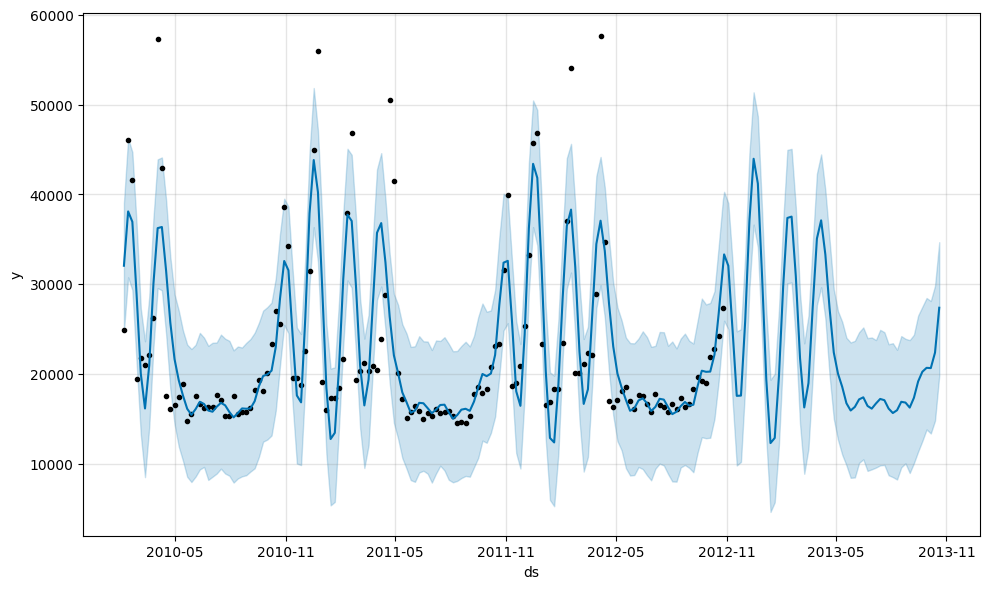

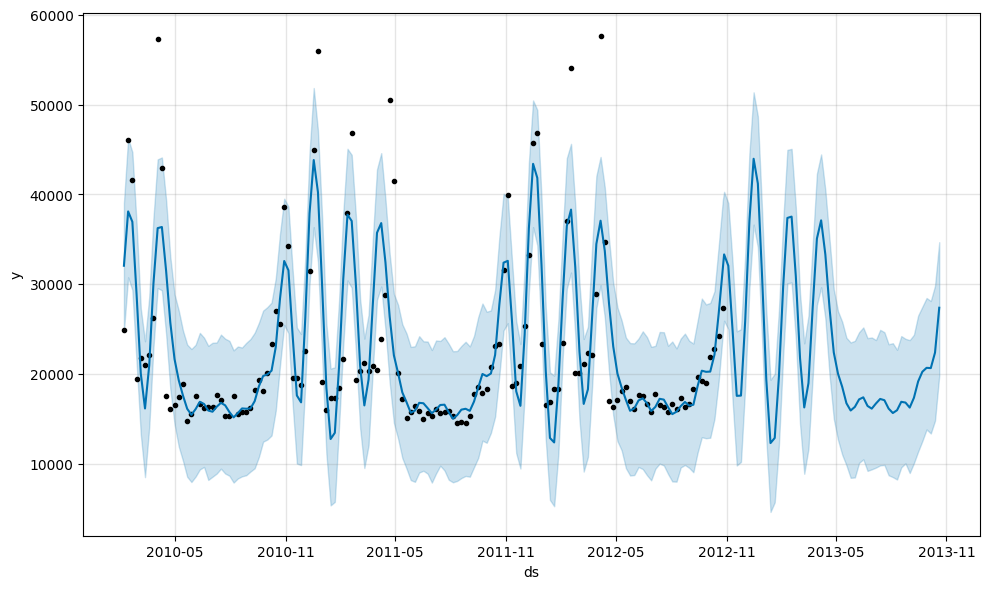

In [65]:
m.plot(forecast2)

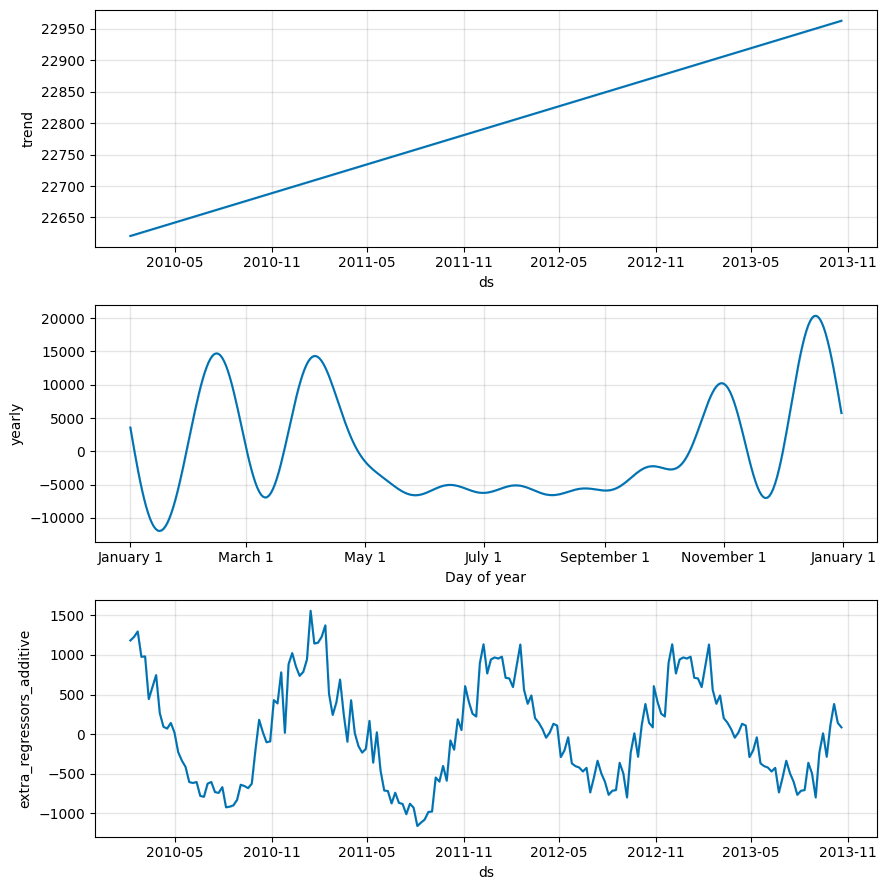

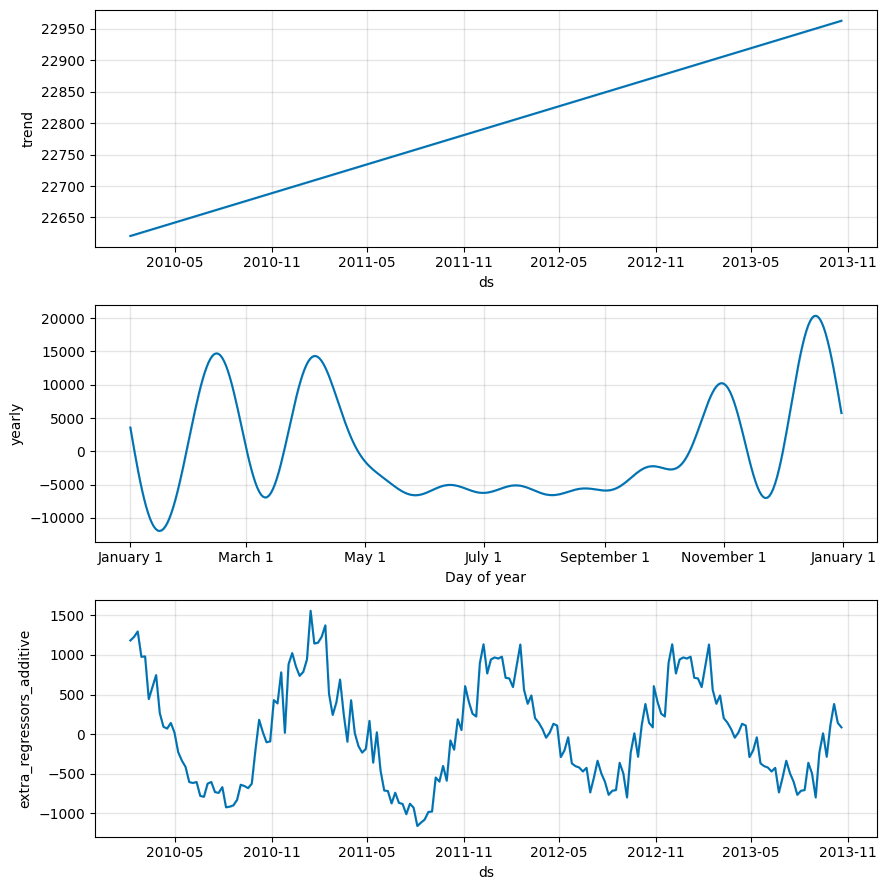

In [66]:
m.plot_components(forecast2)

In [67]:
from prophet.diagnostics import cross_validation

In [68]:
df_cv = cross_validation(m,initial=' 365 days',period='30 days',horizon='60 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/19 [00:00<?, ?it/s]13:29:11 - cmdstanpy - INFO - Chain [1] start processing
13:29:11 - cmdstanpy - INFO - Chain [1] done processing
  5%|▌         | 1/19 [00:00<00:10,  1.73it/s]13:29:12 - cmdstanpy - INFO - Chain [1] start processing
13:29:12 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 2/19 [00:01<00:09,  1.81it/s]13:29:12 - cmdstanpy - INFO - Chain [1] start processing
13:29:13 - cmdstanpy - INFO - Chain [1] done processing
 16%|█▌        | 3/19 [00:01<00:10,  1.59it/s]13:29:13 - cmdstanpy - INFO - Chain [1] start processing
13:29:13 - cmdstanpy - INFO - Chain [1] done processing
 21%|██        | 4/19 [00:02<00:09,  1.65it/s]13:29:13 - cmdstanpy - INFO - Chain [1] start processing
13:29:14 - cmdstanpy - INFO - Chain [1] done processing
 26%|██▋       | 5/19 [00:03<00:08,  1.57it/s]13:29:14 - cmdstanpy - INFO - Chain [1] start processing
13:29:

In [69]:
from prophet.diagnostics import performance_metrics

In [70]:
pm = performance_metrics(df_cv)
# pm

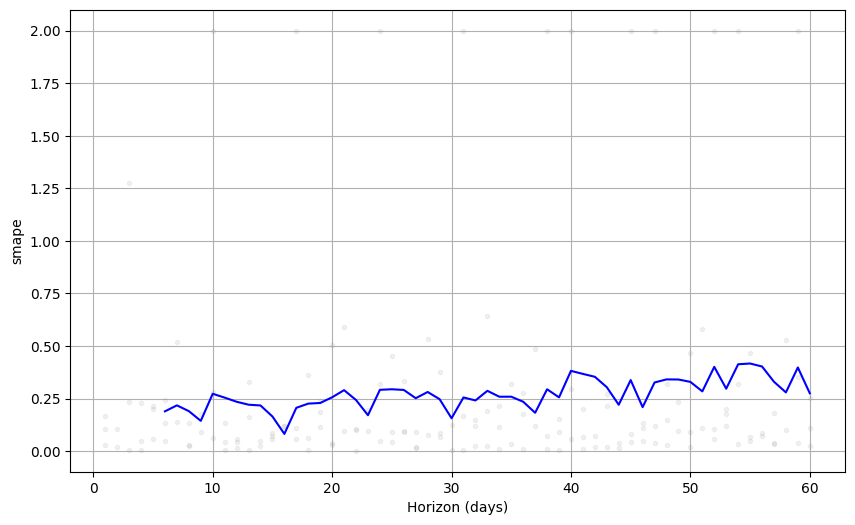

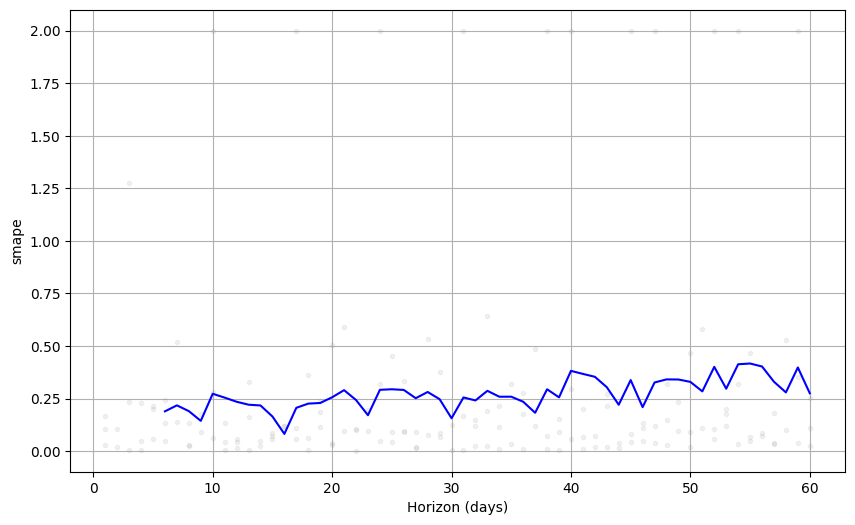

In [71]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='smape')

In [72]:
pm['smape'].mean()

0.2709505430258578

In [73]:
df_cv2 = cross_validation(m2,initial=' 365 days',period='14 days',horizon='60 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/41 [00:00<?, ?it/s]13:29:21 - cmdstanpy - INFO - Chain [1] start processing
13:29:22 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/41 [00:00<00:17,  2.25it/s]13:29:22 - cmdstanpy - INFO - Chain [1] start processing
13:29:22 - cmdstanpy - INFO - Chain [1] done processing
  5%|▍         | 2/41 [00:01<00:23,  1.66it/s]13:29:22 - cmdstanpy - INFO - Chain [1] start processing
13:29:23 - cmdstanpy - INFO - Chain [1] done processing
  7%|▋         | 3/41 [00:01<00:24,  1.56it/s]13:29:23 - cmdstanpy - INFO - Chain [1] start processing
13:29:23 - cmdstanpy - INFO - Chain [1] done processing
 10%|▉         | 4/41 [00:02<00:21,  1.72it/s]13:29:24 - cmdstanpy - INFO - Chain [1] start processing
13:29:24 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 5/41 [00:02<00:20,  1.75it/s]13:29:24 - cmdstanpy - INFO - Chain [1] start processing
13:29:

In [74]:
pm2 = performance_metrics(df_cv2)

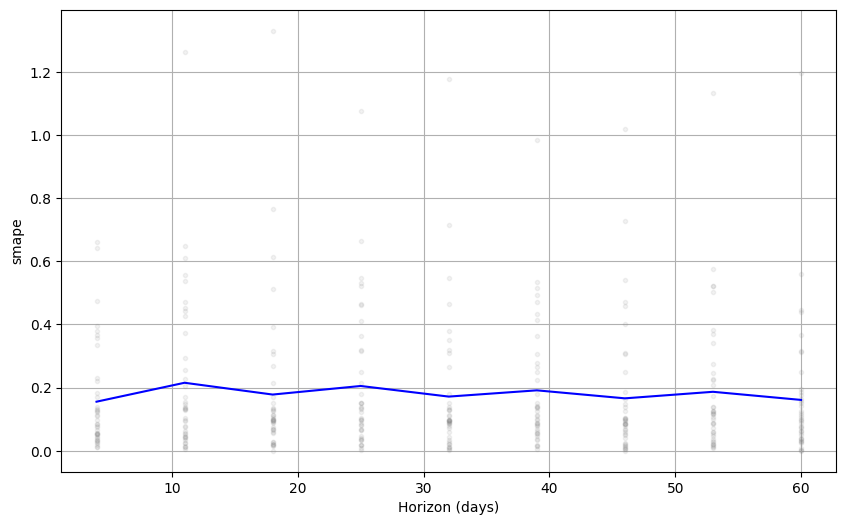

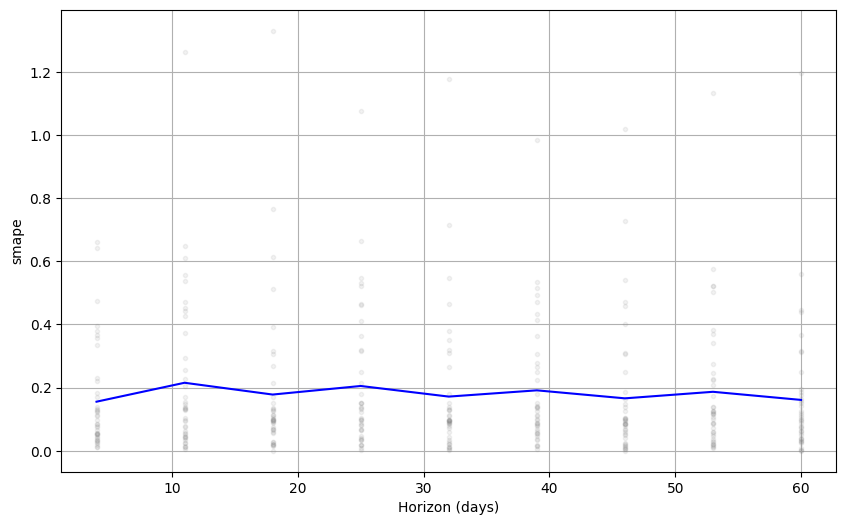

In [75]:
plot_cross_validation_metric(df_cv2,metric='smape')

In [76]:
pm2['smape'].mean()

0.18110915797854288

In [77]:
# df_cv2